## 0. Import Python packages

In [60]:
# for data managaement
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta

# for charting
import plotly
import plotly.graph_objects as go



## 1. Import Data

In [57]:
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv',usecols = list(range(0,10)))


In [66]:
continents = pd.read_csv('Assets/continents.csv')
continents.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


## 2. Data Cleaning and Wrangling

In [111]:
# make datetime
data['dateRep'] = pd.to_datetime(data['dateRep'], dayfirst=True)

#sort values by country and date
data.sort_values(by=['countriesAndTerritories','dateRep'], ascending = True, inplace = True)

#reindex the data now its sorted to prevent errors when creating aggregates
data = data.reindex()

In [112]:
#create cumulative sum of deaths and cases by country
data['total_cases'] = data.groupby(by='countriesAndTerritories')['cases'].cumsum()
data['total_deaths'] = data.groupby(by='countriesAndTerritories')['deaths'].cumsum()

In [108]:
# Create a continents var

data = pd.merge(data, continents[['Continent_Name','Three_Letter_Country_Code']], how='left', left_on='countryterritoryCode', right_on='Three_Letter_Country_Code')


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   dateRep                    9800 non-null   object 
 1   day                        9800 non-null   int64  
 2   month                      9800 non-null   int64  
 3   year                       9800 non-null   int64  
 4   cases                      9800 non-null   int64  
 5   deaths                     9800 non-null   int64  
 6   countriesAndTerritories    9800 non-null   object 
 7   geoId                      9777 non-null   object 
 8   countryterritoryCode       9464 non-null   object 
 9   popData2018                9704 non-null   float64
 10  Continent_Name             9778 non-null   object 
 11  Three_Letter_Country_Code  9442 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 995.3+ KB


In [113]:
latest_data = data['dateRep'].max()- timedelta(days=1)
latest_data_string = latest_data.strftime("%d %b %Y")

In [114]:
data['date_str'] = data['dateRep'].map(lambda x : str(x))

## 3. Plot map

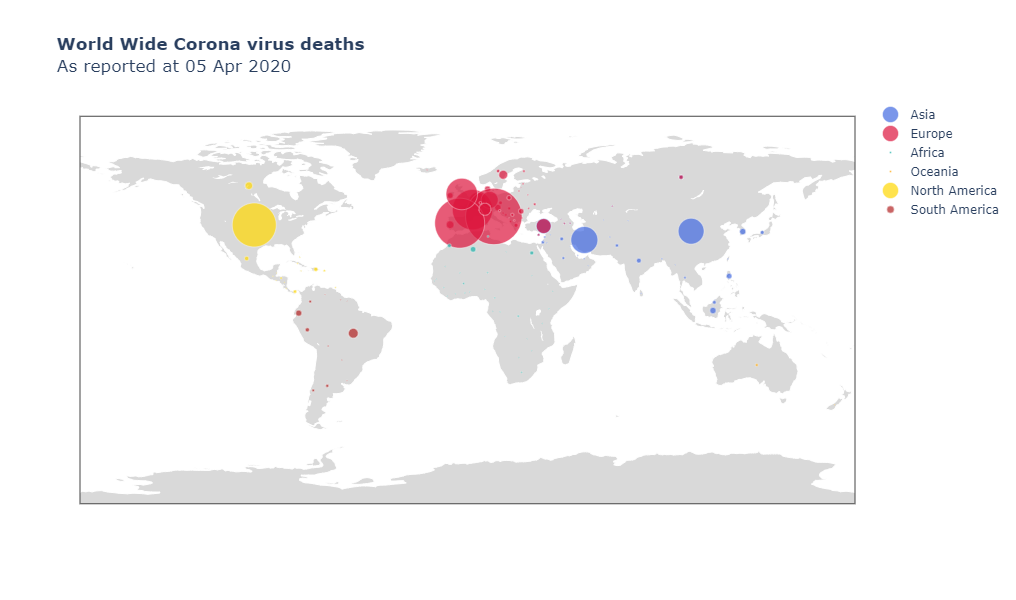

In [128]:

df = data.loc[data['dateRep'] == max(data['dateRep'])].reset_index()

colors = ["royalblue","crimson","lightseagreen","orange","gold","firebrick","peru"]
scale = 5

fig = go.Figure()

for i, cont in enumerate(df['Continent_Name'].unique()):
    df_sub = df[df['Continent_Name'] == cont].reset_index()
    fig.add_trace(go.Scattergeo(
        locationmode = 'ISO-3',
        locations = df_sub['countryterritoryCode'],
        marker = dict(
            size = df_sub['total_deaths']/10,
            color = colors[i],
            line_color= '#ffffff',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{}'.format(cont),
        text = ['{}<BR>Total Deaths: {}'.format(df_sub['countriesAndTerritories'][x],df_sub['total_deaths'][x]) for x in range(len(df_sub))]
       ))

fig.update_layout(
    height = 600,
    width = 1000,
        title_text = '<b> World Wide Corona virus deaths </b> <BR> As reported at ' + latest_data_string,
        showlegend = True,
        geo = dict(
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
            coastlinecolor = '#ffffff',
            countrywidth = 0.5,
            countrycolor = '#ffffff'
            
            
        )
    )

fig.show()